In [1]:
%matplotlib inline
import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from EXPtools.visuals import use_exptools_style

In [2]:
use_exptools_style(usetex=True)

In [3]:
DATAPATH = "../scripts/exp_expansions/density_profiles/"
FILENAME = "bfe_halo_{:04d}_density_profiles_sheng24.h5"

In [4]:
halos = [100, 160, 223, 290, 348, 419, 480, 481, 88, 884, 
    1585, 1603, 2240, 2242, 2259, 2903, 3468, 3499, 4159, 4163, 
    4181, 4797, 4807, 4822, 1500, 3372,4110, 770, 1000, 355]

nhalos = len(halos)

In [5]:
sheng_data = np.loadtxt("../data/MW_LMC_orbits_iso.txt", skiprows=1, usecols=(0, 5))
id_sim, q_mw = sheng_data.T

q_sample = np.zeros(nhalos)
for i in range(nhalos):
    halo_id = np.where(id_sim==halos[i])[0]
    q_sample[i] = q_mw[halo_id[0]]

In [6]:
rbins = np.zeros((nhalos, 100))
profile = np.zeros((nhalos, 100))
for i in range(nhalos):
    f = h5py.File(DATAPATH+FILENAME.format(halos[i]), 'r')
    rbins[i] = np.array(f['suite_{:04d}'.format(halos[i])]['rbins'])
    profile[i] = np.array(f['suite_{:04d}'.format(halos[i])]['profile'])[0]
    

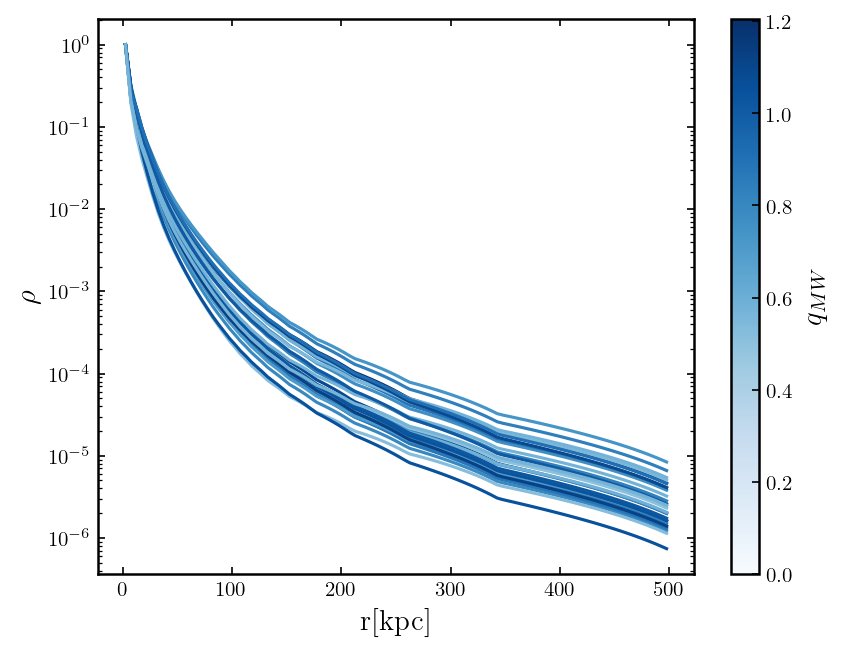

In [9]:
# Normalize q values
norm = mpl.colors.Normalize(vmin=0, vmax=np.max(q_sample))

# Choose colormap
cmap = mpl.cm.Blues

fig, ax = plt.subplots()

for i in range(len(q_sample)):
    color = cmap(norm(q_sample[i]))
    ax.semilogy(rbins[i], profile[i]/profile[i,0], color=color)

# Create colorbar
sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])  # required for matplotlib < 3.7
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label(r"$q_{MW}$")

plt.xlabel(r'$\rm{r[kpc]}$')
plt.ylabel(r'$\rho$')
plt.savefig('density_profiles_sheng_sample.png', bbox_inches='tight')
plt.show()